# Import Library

In [367]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import PowerTransformer,LabelEncoder,StandardScaler,RobustScaler,MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix,f1_score, accuracy_score,precision_score,recall_score


pd.set_option('display.max_columns',None)

# Import Dataset

In [368]:
df = pd.read_csv('DOTA2.csv')

# Data Preprocessing

In [369]:
# Mengubah waktu menjadi variabel menit
df['Time'] = [int(time.split(':')[0])*60 + int(time.split(':')[1]) for time in df['DURASI'].values]

df = df.drop(columns=['match_id','DURASI'])

df.head()

,status,hero_1,hero_2,hero_3,hero_4,hero_5,R1,R2,R3,R4,R5,L1,L2,L3,L4,L5,K,D,A,NET,GPM,XPM,DMG,HEAL,BLD,WARDS_KUNING,WARDS_BIRU,IH1_1,IH1_2,IH1_3,IH1_4,IH1_5,IH1_6,IH1_7,IH2_1,IH2_2,IH2_3,IH2_4,IH2_5,IH2_6,IH2_7,IH3_1,IH3_2,IH3_3,IH3_4,IH3_5,IH3_6,IH3_7,IH4_1,IH4_2,IH4_3,IH4_4,IH4_5,IH4_6,IH4_7,IH5_1,IH5_2,IH5_3,IH5_4,IH5_5,IH5_6,IH5_7,Time
0,W,85,38,17,137,14,Support,Core,Core,Core,Core,Bottom,Top,Middle,Roaming,Bottom,31,11,80,71700,2500,3300,75300,14000,20100.0,15,22,269,214,218,79,30,185,290,185,635,36,29,9,116,306,63,116,178,259,250,41,361,50,116,185,1,36,31,574,50,116,117,1,108,131,331,31
1,L,110,136,58,22,41,Support,Core,Support,Core,Core,Bottom,Bottom,Roaming,Middle,Top,10,37,30,45300,1800,1900,55500,3600,1200.0,16,30,0,0,34,98,244,214,290,50,11,36,17,73,116,949,185,218,29,0,36,593,676,259,36,100,180,0,41,990,63,116,166,0,36,75,306,31
2,L,38,19,128,14,114,Core,Support,Support,Core,Core,Top,Top,Roaming,Bottom,Middle,19,37,37,51100,1900,2400,91800,1400,3300.0,15,25,931,11,635,34,0,0,675,180,40,34,244,1,188,838,102,188,218,34,29,38,357,31,50,116,108,73,125,358,50,116,168,36,569,252,828,32
3,W,54,136,61,52,31,Core,Support,Core,Core,Support,Top,Bottom,Bottom,Middle,Top,37,20,98,77200,2700,3500,105200,11700,30200.0,16,27,112,50,143,151,154,168,828,30,1,36,214,254,232,949,139,75,908,180,116,75,381,48,119,121,31,1,116,357,36,102,254,218,214,0,675,32
4,L,128,65,43,6,137,Support,Core,Core,Core,Support,Bottom,Middle,Top,Bottom,Top,11,28,24,44700,1600,1900,63400,0,2200.0,14,27,0,0,42,102,36,214,331,48,36,116,1,40,232,828,244,596,48,40,36,116,1076,263,63,116,34,75,75,309,214,36,188,21,0,40,680,31


In [370]:
num = ['Time','K','D','A','NET','GPM','XPM','HEAL','BLD','WARDS_KUNING','WARDS_BIRU']
obj = df.drop(columns=num).columns

In [371]:
# Solve inconsistency data for Role variables
map_role = {
    'Core' : 'Core',
    'Support' : 'Support',
    'support' : 'Support',
    'Support ' : 'Support',
    'Supprt' : 'Support',
    ' Suport' : 'Support'
}

df = df.replace(map_role, regex=True)

In [372]:
map_lane = {
    'Top' : 'Top',
    'Bottom' : 'Bottom',
    'Middle' : 'Middle',
    'Roaming' : 'Roaming',
    'Jungle' : 'Jungle',
    'Bottom ' : 'Bottom',
    'midle' : 'Middle',
    'middle' : 'Middle',
    'MIddle' : 'Middle',
    'top' : 'Top',
    'bottom' : 'Bottom',
    'Nottom' : 'Bottom',
    'Bototm' : 'Bottom',
    ' Middle' : 'Middle',
    'Roaing' : 'Roaming',
    'Dire' : 'Jungle',
    
}

df = df.replace(map_lane, regex=True)

##### Casting Data

In [373]:
for col in obj:
    df[col] = df[col].astype('object')

##### Encoding Data

In [374]:
le = LabelEncoder()
for column in obj:
    df[column] = le.fit_transform(df[column])

##### Resampling Bootstrapping

In [375]:
# Fungsi untuk melakukan resampling Bootstrap pada DataFrame
def bootstrap_resampling(df, num_samples):
    resamples = []
    n = len(df)
    for _ in range(num_samples):
        # Mengambil sampel acak dengan penggantian
        bootstrap_sample = df.sample(n=n, replace=True,random_state=42)
        resamples.append(bootstrap_sample)
    return resamples

# Memanggil fungsi bootstrap_resampling()
resamples = bootstrap_resampling(df, num_samples=10)

# Menggabungkan semua sampel resampling menjadi satu dataset
bootstrap_dataset = pd.concat(resamples, ignore_index=True)

df = bootstrap_dataset

In [376]:
df.status.value_counts()

1    1530
0    1370
Name: status, dtype: int64

# Feature Scaling

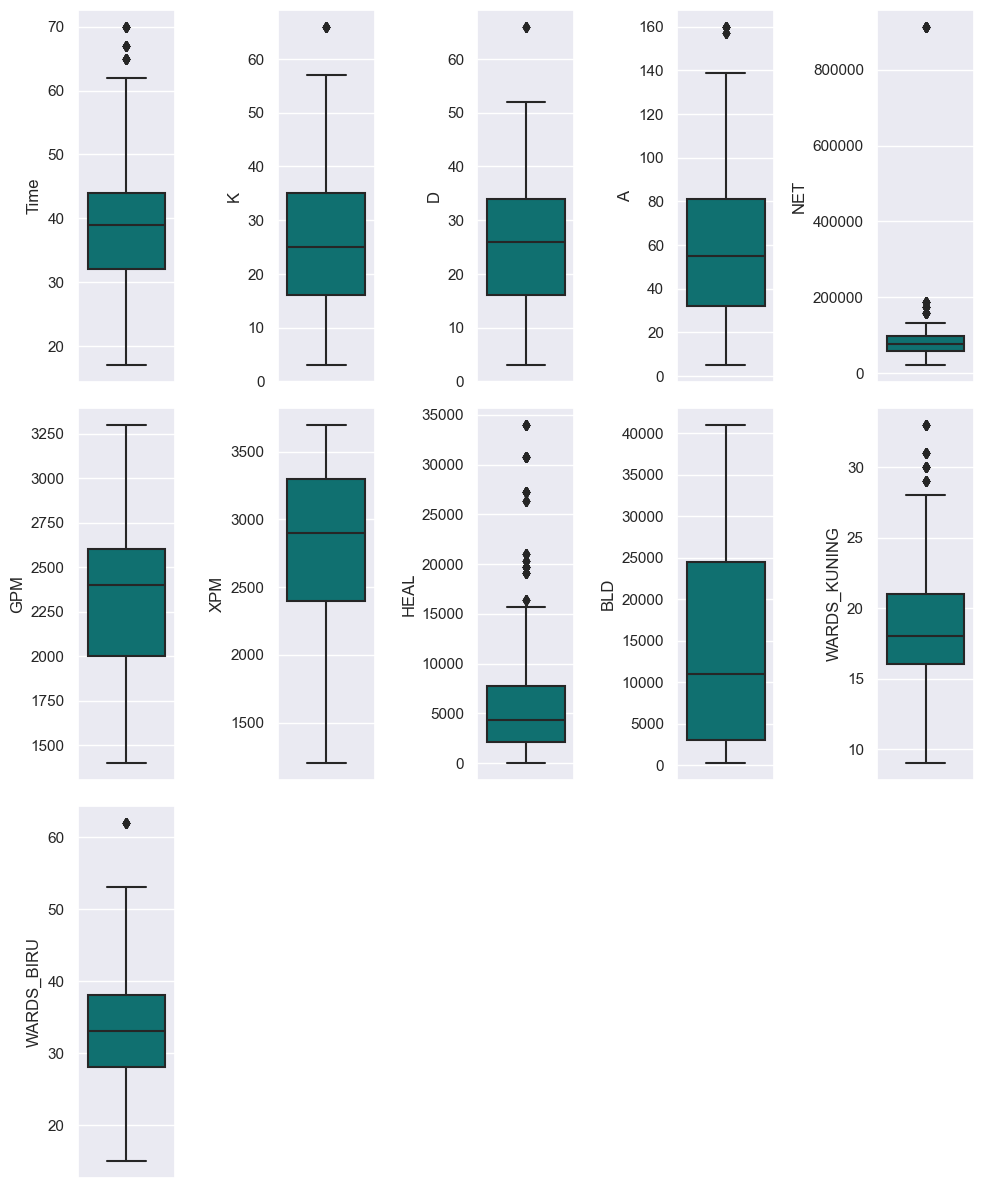

In [377]:
plt.figure(figsize=(10,20))
# plotting
for i in range(0, len(num)):
    plt.subplot(5, 5, i+1)
    sns.boxplot(y=df[num[i]],color='teal', orient='v')
    plt.tight_layout()

In [378]:
# scaling pada data numerik
scaler_num = RobustScaler()
# scaler = MinMaxScaler()
df[num] = scaler_num.fit_transform(df[num])
scaler_power = PowerTransformer()
df[num] = scaler_power.fit_transform(df[num])


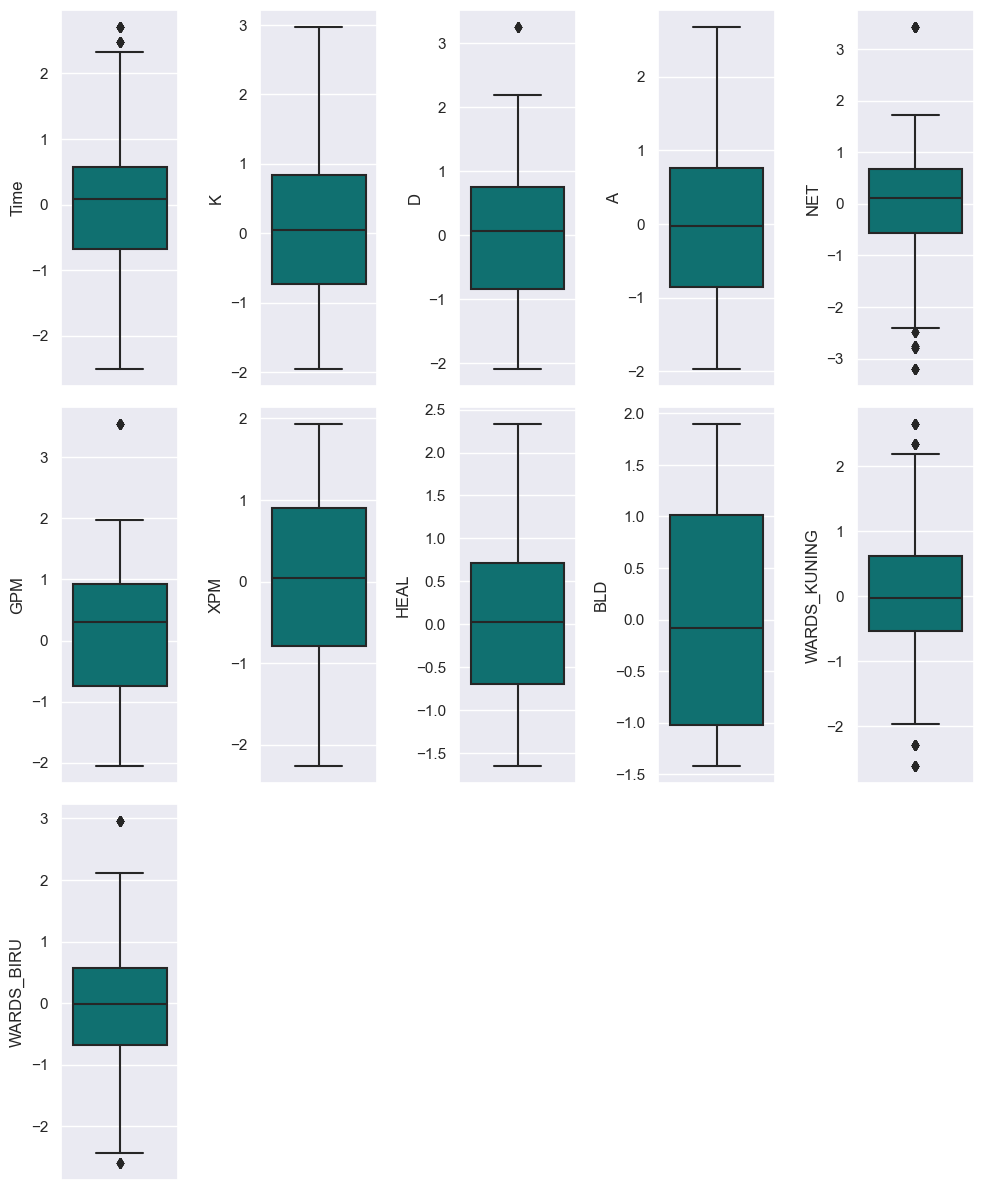

In [379]:
plt.figure(figsize=(10,20))
# plotting
for i in range(0, len(num)):
    plt.subplot(5, 5, i+1)
    sns.boxplot(y=df[num[i]],color='teal', orient='v')
    plt.tight_layout()

# Train Test Split

In [380]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['status']), df.status, test_size=0.3, random_state=42, stratify=df.status)



# Feature Outlier Analysis

In [381]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.impute import SimpleImputer

# Menggunakan Isolation Forest
isolation_forest = IsolationForest(n_estimators=100, random_state=42, verbose=1)
isolation_forest.fit(X_train)

# Menggunakan Local Outlier Factor
lof = LocalOutlierFactor()
lof_pred = lof.fit_predict(X_train)

# Menggabungkan prediksi outlier dari Isolation Forest dan LOF
ensemble_pred = np.where((isolation_forest.predict(X_train) == -1) & (lof_pred == -1), -1, 1)

# Mengganti nilai outlier dengan NaN
X_train.loc[ensemble_pred == -1] = np.nan

# Menangani nilai-nilai ekstrim yang bukan outlier
percentile_2 = np.percentile(X_train, 1)
percentile_98 = np.percentile(X_train, 99)
X_train[(X_train > percentile_98) | (X_train < percentile_2)] = np.nan

# # Mengisi nilai-nilai NaN dengan nilai median
# X_train = X_train.fillna(X_train.median())

# Membuat imputer untuk imputasi menggunakan SimpleImputer
imputer = SimpleImputer(strategy='median')

# Melakukan imputasi pada nilai yang hilang menggunakan Random Forest Classification
X_train_imputed = imputer.fit_transform(X_train)

# Menampilkan data yang telah diimputasi
X_train = pd.DataFrame(X_train_imputed, columns=X_train.columns)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


# Feature Importance

In [382]:
from sklearn.ensemble import RandomForestClassifier
# Membuat model random forest
rf = RandomForestClassifier(random_state=42,verbose=1,n_jobs=-1,n_estimators=100)
rf.fit(X_train, y_train)

# Mendapatkan feature importance pada random forest
importance = rf.feature_importances_

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


In [383]:
# Mendapatkan feature importance pada random forest dan menambahkan nama kolom
# pd.set_option('display.max_rows',None)
importance = pd.DataFrame({'feature': X_train.columns, 'importance': rf.feature_importances_})
importance.sort_values('importance').head(50)

,feature,importance
7,R3,0.000264
9,R5,0.001052
8,R4,0.001108
5,R1,0.001262
6,R2,0.001776
13,L4,0.002555
14,L5,0.002985
11,L2,0.003208
2,hero_3,0.003374
10,L1,0.004290


# Balancing Data

In [384]:
# Inisialisasi SMOTE
from imblearn.over_sampling import SMOTEN

smote = SMOTEN(random_state=42)
# Resampling pada train set
X_train, y_train = smote.fit_resample(X_train, y_train)

# Modelling

### SVC

##### Tuning

In [385]:
# # train the model on train set
# from sklearn.svm import SVC
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import uniform

# # defining parameter range
# param_grid = {'C': uniform(loc=0.1, scale=1000),
#             'gamma': uniform(loc=0.0001, scale=1),
#             'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
#             'degree': [2, 3, 4, 5],
#             'coef0': uniform(loc=0.0, scale=1.0)}

# random_search = RandomizedSearchCV(SVC(), param_distributions=param_grid, refit=True, verbose=3)
# random_search.fit(X_train, y_train)


In [386]:
# # Cetak hyperparameter terbaik dan akurasi model
# print("Hyperparameter terbaik: ", random_search.best_params_)
# print("Akurasi terbaik: ", random_search.best_score_)

##### Fitting

In [387]:
from sklearn.svm import SVC

# Defining the SVC model with the specified parameters
svc_model = SVC(C=875.5435906835379, coef0=0.7212236263601225, degree=2, gamma=0.2521164544469635, kernel='rbf')
# Fitting the model to the training data
svc_model.fit(X_train, y_train)


SVC(C=875.5435906835379, coef0=0.7212236263601225, degree=2,
    gamma=0.2521164544469635)

In [388]:
y_pred_svc = svc_model.predict(X_test)

##### Evaluation

In [389]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91       411
           1       0.87      1.00      0.93       459

    accuracy                           0.92       870
   macro avg       0.94      0.92      0.92       870
weighted avg       0.93      0.92      0.92       870



In [390]:
# Menghitung F1 score micro
f1_micro = f1_score(y_test, y_pred_svc, average='micro')

print('F1 score micro:', f1_micro)

# Menghitung F1 score micro
f1_micro = f1_score(y_test, y_pred_svc, average='macro')

print('F1 score macro:', f1_micro)

F1 score micro: 0.9229885057471264
F1 score macro: 0.9216189867885838


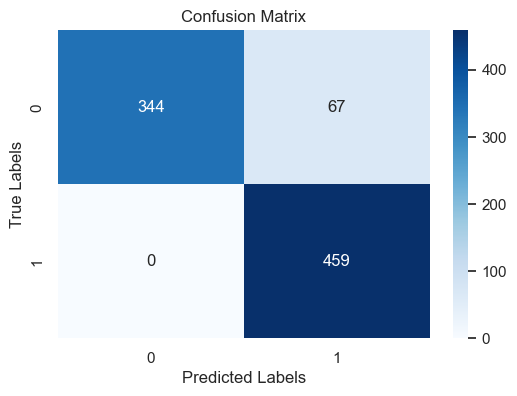

In [391]:
cm = confusion_matrix(y_test, y_pred_svc)

# Membuat heatmap dari confusion matrix
sns.set()
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### RFC

##### Tuning

In [392]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import RandomizedSearchCV
# # Tentukan hyperparameter yang akan diuji
# param_dist = {
#     'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 3000, num =10)],
#     'max_features': ['auto', 'sqrt'],
#     'max_depth': [int(x) for x in np.linspace(10, 200, num = 10)],
#     'min_samples_split': [int(x) for x in np.linspace(2, 20)],
#     'min_samples_leaf': [int(x) for x in np.linspace(1, 20)]
# }

In [393]:
# # Buat objek RandomForestClassifier
# rfc = RandomForestClassifier(random_state=42)

# # Buat objek RandomizedSearchCV
# random_search = RandomizedSearchCV(estimator=rfc, param_distributions=param_dist, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

# # Lakukan training model dengan GridSearchCnV
# random_search.fit(X_train, y_train)

In [394]:
# # Cetak hyperparameter terbaik dan akurasi model
# print("Hyperparameter terbaik: ", random_search.best_params_)
# print("Akurasi terbaik: ", random_search.best_score_)

##### Fitting

In [395]:
from sklearn.ensemble import RandomForestClassifier

# Defining the RFC model with the specified parameters
rfc_model = RandomForestClassifier(n_estimators=822, min_samples_split=5, min_samples_leaf=5, max_features='sqrt', max_depth=200)

# Fitting the model to the training data
rfc_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=200, min_samples_leaf=5, min_samples_split=5,
                       n_estimators=822)

In [396]:
y_pred_rfc = rfc_model.predict(X_test)

##### Evaluation

In [397]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       411
           1       0.97      0.94      0.96       459

    accuracy                           0.96       870
   macro avg       0.95      0.96      0.96       870
weighted avg       0.96      0.96      0.96       870



In [398]:
# Menghitung F1 score micro
f1_micro = f1_score(y_test, y_pred_rfc, average='micro')

print('F1 score micro:', f1_micro)

# Menghitung F1 score micro
f1_micro = f1_score(y_test, y_pred_rfc, average='macro')

print('F1 score macro:', f1_micro)

F1 score micro: 0.9551724137931035
F1 score macro: 0.9550997452608595


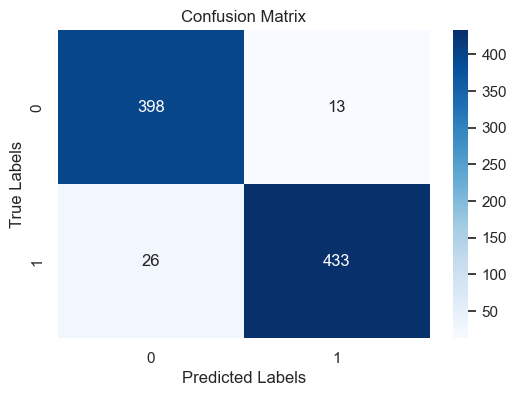

In [399]:
cm = confusion_matrix(y_test, y_pred_rfc)

# Membuat heatmap dari confusion matrix
sns.set()
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### GausianNB (Naive Bayes)

In [400]:
# from sklearn.naive_bayes import GaussianNB
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import uniform

# param_grid = {'var_smoothing': uniform(loc=1e-9, scale=1e-5)}

# random_search_nv = RandomizedSearchCV(GaussianNB(), param_distributions=param_grid, cv=7, scoring='accuracy')
# random_search_nv.fit(X_train, y_train)



In [401]:
# best_params = random_search_nv.best_params_
# best_score = random_search_nv.best_score_
# print("Best hyperparameters:", best_params)
# print("Best score:", best_score)


In [402]:
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Naive Bayes model
model_nb = GaussianNB(var_smoothing=9.974812938618999e-06)

# Fitting the model to the training data
model_nb.fit(X_train, y_train)


GaussianNB(var_smoothing=9.974812938618999e-06)

In [403]:
y_pred_nb = model_nb.predict(X_test)

##### Evaluation

In [404]:
print(classification_report(y_test, y_pred_nb))
# Menghitung F1 score micro
f1_micro = f1_score(y_test, y_pred_nb, average='micro')

print('F1 score micro:', f1_micro)

# Menghitung F1 score micro
f1_micro = f1_score(y_test, y_pred_nb, average='macro')

print('F1 score macro:', f1_micro)

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       411
           1       0.85      0.86      0.85       459

    accuracy                           0.84       870
   macro avg       0.84      0.84      0.84       870
weighted avg       0.84      0.84      0.84       870

F1 score micro: 0.8413793103448276
F1 score macro: 0.8407658517952634


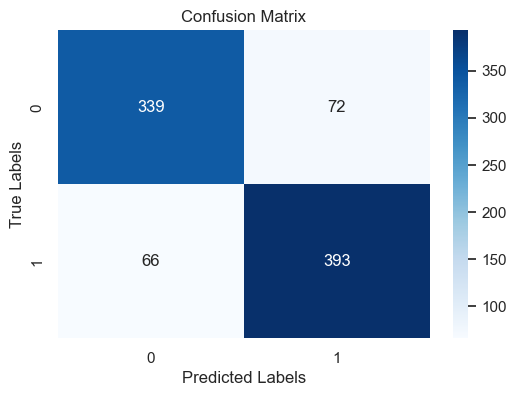

In [405]:
cm = confusion_matrix(y_test, y_pred_nb)

# Membuat heatmap dari confusion matrix
sns.set()
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


### KNN

##### Tuning

In [406]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import randint

# # Membuat model KNN
# knn = KNeighborsClassifier()

# # Membuat dictionary berisi parameter yang akan diuji
# params = {'n_neighbors': randint(3, 12),  # Menggunakan distribusi acak untuk n_neighbors dari 3 hingga 11
#         'weights': ['uniform', 'distance'],
#         'p': [1, 2]}

# # Melakukan Randomized Search dengan cross validation
# random_search_knn = RandomizedSearchCV(knn, param_distributions=params, scoring='accuracy', cv=5, n_iter=10)
# random_search_knn.fit(X_train, y_train)

# # Menampilkan parameter terbaik dan skor akurasi terbaik
# print("Best parameters:", random_search_knn.best_params_)
# print("Best accuracy score:", random_search_knn.best_score_)

# # Membuat model baru dengan parameter terbaik dan melatih pada data training
# best_knn = KNeighborsClassifier(n_neighbors=random_search_knn.best_params_['n_neighbors'], 
#                                 weights=random_search_knn.best_params_['weights'], 
#                                 p=random_search_knn.best_params_['p'])
# best_knn.fit(X_train, y_train)


##### Fitting

In [407]:
from sklearn.neighbors import KNeighborsClassifier

# Membuat model KNN
knn = KNeighborsClassifier(n_neighbors=3, p=1, weights='distance')

# Melatih model pada data training
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3, p=1, weights='distance')

In [408]:
y_pred_knn = knn.predict(X_test)

##### Evaluation

In [409]:
print(classification_report(y_test, y_pred_knn))
# Menghitung F1 score micro
f1_micro = f1_score(y_test, y_pred_knn, average='micro')

print('F1 score micro:', f1_micro)

# Menghitung F1 score micro
f1_micro = f1_score(y_test, y_pred_knn, average='macro')

print('F1 score macro:', f1_micro)

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       411
           1       0.93      0.92      0.93       459

    accuracy                           0.92       870
   macro avg       0.92      0.92      0.92       870
weighted avg       0.92      0.92      0.92       870

F1 score micro: 0.9218390804597701
F1 score macro: 0.9216735072156759


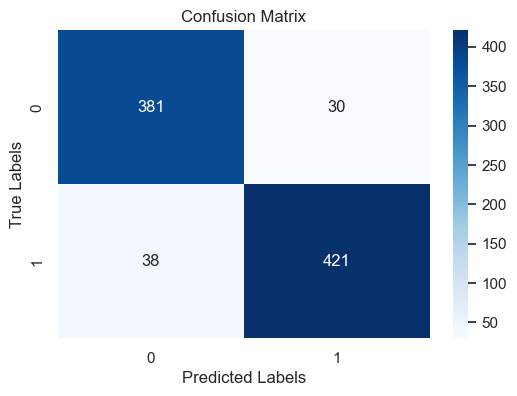

In [410]:
cm = confusion_matrix(y_test, y_pred_knn)

# Membuat heatmap dari confusion matrix
sns.set()
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


### GBoost

##### Tuning

In [411]:
# from sklearn.metrics import accuracy_score
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.model_selection import RandomizedSearchCV

# # Create the GradientBoostingClassifier
# model = GradientBoostingClassifier()

# # Define the hyperparameter space
# params = {
#     'learning_rate': np.logspace(-3, 0, 10),
#     'n_estimators': np.arange(100, 1000, 100),
#     'max_depth': np.arange(1, 10),
#     'min_samples_split': np.arange(2, 10),
#     'min_samples_leaf': np.arange(1, 10),
#     'max_features': np.arange(0.1, 1.0, 0.1)
# }

# # Create the RandomizedSearchCV object
# best_gb = RandomizedSearchCV(model, params, cv=7, n_iter=100,n_jobs=-1,verbose=3)

# # Fit the model
# best_gb.fit(X_train, y_train)

In [412]:
# best_params = best_gb.best_params_
# best_score = best_gb.best_score_
# print("Best hyperparameters:", best_params)
# print("Best score:", best_score)

In [413]:
##### Fitting

In [414]:
from sklearn.ensemble import GradientBoostingClassifier

# Membuat model Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=400,
                                min_samples_split=4,
                                min_samples_leaf=4,
                                max_features=0.8,
                                max_depth=4,
                                learning_rate=0.046415888336127774,verbose=1,random_state=42)

# Melatih model pada data training
gb.fit(X_train, y_train)


      Iter       Train Loss   Remaining Time 
         1           1.3173            3.41s
         2           1.2531            3.40s
         3           1.1927            3.55s
         4           1.1404            3.64s
         5           1.0900            3.50s
         6           1.0431            3.40s
         7           1.0023            3.38s
         8           0.9610            3.32s
         9           0.9239            3.31s
        10           0.8907            3.28s
        20           0.6330            3.21s
        30           0.4746            3.08s
        40           0.3791            3.00s
        50           0.3164            2.87s
        60           0.2743            2.77s
        70           0.2477            2.70s
        80           0.2295            2.62s
        90           0.2167            2.53s
       100           0.2069            2.44s
       200           0.1805            1.59s
       300           0.1780            0.79s
       40

GradientBoostingClassifier(learning_rate=0.046415888336127774, max_depth=4,
                           max_features=0.8, min_samples_leaf=4,
                           min_samples_split=4, n_estimators=400,
                           random_state=42, verbose=1)

In [415]:
y_pred_gb = gb.predict(X_test)

##### Evaluation

In [416]:
print(classification_report(y_test, y_pred_gb))
# Menghitung F1 score micro
f1_micro = f1_score(y_test, y_pred_gb, average='micro')

print('F1 score micro:', f1_micro)

# Menghitung F1 score micro
f1_micro = f1_score(y_test, y_pred_gb, average='macro')

print('F1 score macro:', f1_micro)


              precision    recall  f1-score   support

           0       0.97      0.95      0.96       411
           1       0.96      0.97      0.96       459

    accuracy                           0.96       870
   macro avg       0.96      0.96      0.96       870
weighted avg       0.96      0.96      0.96       870

F1 score micro: 0.9620689655172414
F1 score macro: 0.9619276718592318


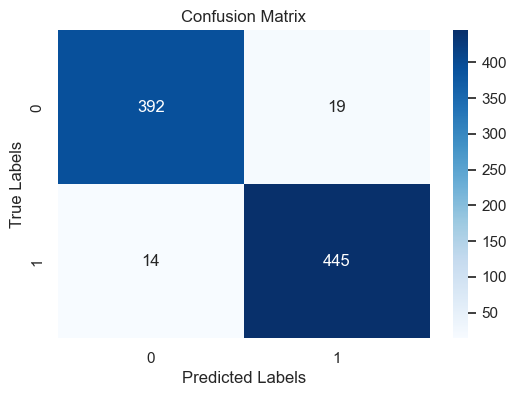

In [417]:
cm = confusion_matrix(y_test, y_pred_gb)

# Membuat heatmap dari confusion matrix
sns.set()
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


### Bagging DTC

##### Tuning

In [418]:
# from sklearn.ensemble import BaggingClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import randint

# # Definisikan model Decision Tree Classifier
# dtc = DecisionTreeClassifier(random_state=42)

# # Definisikan model Bagging Classifier dengan Decision Tree Classifier sebagai base estimator
# bag_clf = BaggingClassifier(estimator=dtc,random_state=42)

# # Definisikan hyperparameter space yang akan di-tune
# param_dist = {
#     'n_estimators': randint(10, 100),
#     'max_samples': [0.5, 0.6, 0.7, 0.8, 0.9],
#     'max_features': [0.5, 0.6, 0.7, 0.8, 0.9],
#     'bootstrap': [True, False],
#     'bootstrap_features': [True, False]
# }

# # Inisialisasi Randomized Search CV dengan menggunakan hyperparameter space dan 5-fold cross validation
# best_bg = RandomizedSearchCV(bag_clf, param_distributions=param_dist, cv=7, n_iter=20,random_state=42,n_jobs=-1,verbose=1)

# # Lakukan training menggunakan Randomized Search CV
# best_bg.fit(X_train, y_train)

# # Cetak hasil tuning
# print('Best parameters:', best_bg.best_params_)
# print('Best score:', best_bg.best_score_)


##### Fitting

In [419]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Definisikan model Decision Tree Classifier
dtc = DecisionTreeClassifier(random_state=42,criterion='gini',max_depth=None,min_samples_leaf=3,min_samples_split=2)

# Membuat model Bagging dengan Decision Tree Classifier sebagai estimator
bagging = BaggingClassifier(estimator=dtc, n_estimators=81,
                            max_samples=0.7, max_features=0.9,
                            bootstrap=True, bootstrap_features=False,random_state=42,n_jobs=-1)

# Melatih model pada data training
bagging.fit(X_train, y_train)


BaggingClassifier(estimator=DecisionTreeClassifier(min_samples_leaf=3,
                                                   random_state=42),
                  max_features=0.9, max_samples=0.7, n_estimators=81, n_jobs=-1,
                  random_state=42)

In [420]:
y_pred_bg = bagging.predict(X_test)

##### Evaluation

In [421]:
print(classification_report(y_test, y_pred_bg))
# Menghitung F1 score micro
f1_micro = f1_score(y_test, y_pred_bg, average='micro')

print('F1 score micro:', f1_micro)

# Menghitung F1 score micro
f1_micro = f1_score(y_test, y_pred_bg, average='macro')

print('F1 score macro:', f1_micro)


              precision    recall  f1-score   support

           0       0.96      0.98      0.97       411
           1       0.98      0.96      0.97       459

    accuracy                           0.97       870
   macro avg       0.97      0.97      0.97       870
weighted avg       0.97      0.97      0.97       870

F1 score micro: 0.9689655172413794
F1 score macro: 0.9688964393109813


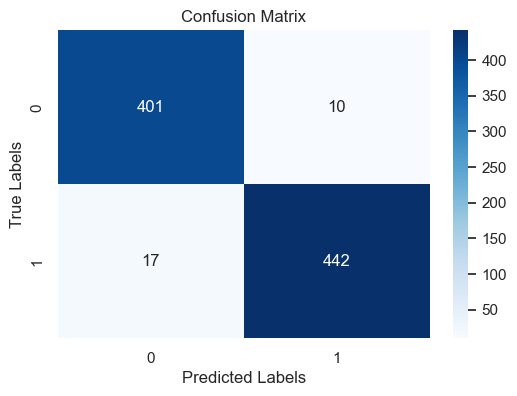

In [422]:
cm = confusion_matrix(y_test, y_pred_bg)

# Membuat heatmap dari confusion matrix
sns.set()
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# Desicion Tree

In [423]:
from sklearn.tree import DecisionTreeClassifier

# Definisikan model Decision Tree Classifier
dtc = DecisionTreeClassifier(random_state=42,criterion='gini',max_depth=None,min_samples_leaf=3,min_samples_split=2)

dtc.fit(X_train,y_train)

y_pred_dtc = dtc.predict(X_test)

In [424]:
print(classification_report(y_test, y_pred_dtc))
# Menghitung F1 score micro
f1_micro = f1_score(y_test, y_pred_dtc, average='micro')

print('F1 score micro:', f1_micro)

# Menghitung F1 score micro
f1_micro = f1_score(y_test, y_pred_dtc, average='macro')

print('F1 score macro:', f1_micro)


              precision    recall  f1-score   support

           0       0.96      0.96      0.96       411
           1       0.97      0.96      0.96       459

    accuracy                           0.96       870
   macro avg       0.96      0.96      0.96       870
weighted avg       0.96      0.96      0.96       870

F1 score micro: 0.9620689655172414
F1 score macro: 0.9619672131147541


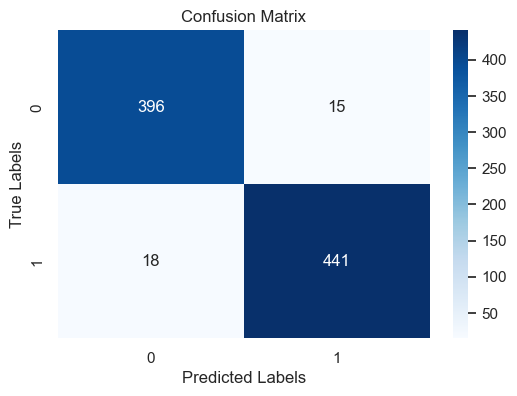

In [425]:
cm = confusion_matrix(y_test, y_pred_dtc)

# Membuat heatmap dari confusion matrix
sns.set()
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# Ensemble

In [426]:
# Initialize base estimators
from sklearn.ensemble import VotingClassifier

# Definisikan model Decision Tree Classifier
dtc = DecisionTreeClassifier(random_state=42,criterion='gini',max_depth=None,min_samples_leaf=3,min_samples_split=2)
# Defining the RFC model with the specified parameters
rfc_model = RandomForestClassifier(n_estimators=822, min_samples_split=5, min_samples_leaf=5, max_features='sqrt', max_depth=200)
# Defining the SVC model with the specified parameters
svc_model = SVC(C=875.5435906835379, coef0=0.7212236263601225, degree=2, gamma=0.2521164544469635, kernel='rbf')
# Initialize ensemble classifier
ensemble = VotingClassifier(estimators=[('svc', svc_model),('rfc', rfc_model), ('dtc',dtc)],verbose=1,n_jobs=-1,voting='hard')

# Fit model to training data
ensemble.fit(X_train, y_train)

# Evaluate model on testing data
score = ensemble.score(X_test, y_test)
print("Accuracy:", score)

Accuracy: 0.960919540229885


In [427]:
y_pred_ensemble = ensemble.predict(X_test)

##### Evaluation

In [428]:
print(classification_report(y_test, y_pred_ensemble))
# Menghitung F1 score micro
f1_micro = f1_score(y_test, y_pred_ensemble, average='micro')

print('F1 score micro:', f1_micro)

# Menghitung F1 score micro
f1_micro = f1_score(y_test, y_pred_ensemble, average='macro')

print('F1 score macro:', f1_micro)


              precision    recall  f1-score   support

           0       0.97      0.95      0.96       411
           1       0.96      0.97      0.96       459

    accuracy                           0.96       870
   macro avg       0.96      0.96      0.96       870
weighted avg       0.96      0.96      0.96       870

F1 score micro: 0.960919540229885
F1 score macro: 0.9607683982683982


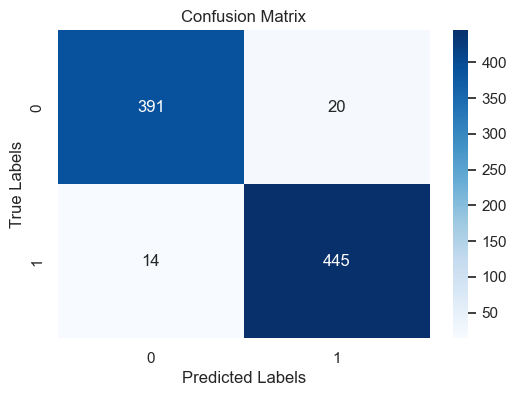

In [429]:
cm = confusion_matrix(y_test, y_pred_ensemble)

# Membuat heatmap dari confusion matrix
sns.set()
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# Visualization Model


In [430]:
import plotly.express as px
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

data = pd.DataFrame({'model': ['SVC', 'RFC', 'DTC', 'Ensemble'],
                     'accuracy': [round(accuracy_score(y_test, y_pred_svc), 5),
                                  round(accuracy_score(y_test, y_pred_rfc), 5),
                                  round(accuracy_score(y_test, y_pred_dtc), 5),
                                  round(accuracy_score(y_test, y_pred_ensemble), 5)],
                     'precision': [round(precision_score(y_test, y_pred_svc), 5),
                                   round(precision_score(y_test, y_pred_rfc), 5),
                                   round(precision_score(y_test, y_pred_dtc), 5),
                                   round(precision_score(y_test, y_pred_ensemble), 5)],
                     'recall': [round(recall_score(y_test, y_pred_svc), 5),
                                round(recall_score(y_test, y_pred_rfc), 5),
                                round(recall_score(y_test, y_pred_dtc), 5),
                                round(recall_score(y_test, y_pred_ensemble), 5)],
                     'f1_score': [round(f1_score(y_test, y_pred_svc), 5),
                                  round(f1_score(y_test, y_pred_rfc), 5),
                                  round(f1_score(y_test, y_pred_dtc), 5),
                                  round(f1_score(y_test, y_pred_ensemble), 5)]})

# Sort the data based on f1_score
data = data.sort_values(by='f1_score', ascending=False)

# Melt the dataset to "long-form" format
data_melted = pd.melt(data, id_vars=['model'], var_name='metric', value_name='score')

# Create multi barplot with Plotly
fig = px.bar(data_melted, x='model', y='score', color='metric',
             color_discrete_sequence=['#636EFA', '#EF553B', '#00CC96', '#AB63FA'],
             barmode='group', text_auto='.5')

fig.update_layout(xaxis_tickangle=0, xaxis_title=None, yaxis_title='Score')
fig.show()


In [431]:
import plotly.graph_objects as go
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC for each model
models = ['SVC', 'RFC', 'DTC', 'Ensemble']
y_preds = [y_pred_svc, y_pred_rfc, y_pred_dtc, y_pred_ensemble]
roc_auc_scores = []

fig = go.Figure()

for model, y_pred in zip(models, y_preds):
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    roc_auc_scores.append(roc_auc)
    fig.add_trace(go.Scatter(x=fpr, y=tpr, name=f'{model} (AUC = {roc_auc:.5f})'))

fig.update_layout(
    title='Receiver Operating Characteristic (ROC) Curve',
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    xaxis=dict(range=[0, 1], dtick=0.1),
    yaxis=dict(range=[0, 1], dtick=0.1),
    legend=dict(x=0.7, y=0.2),
)

fig.add_shape(
    type='line',
    x0=0,
    y0=0,
    x1=1,
    y1=1,
    line=dict(color='gray', dash='dash'),
)

fig.add_annotation(
    x=0.5,
    y=0.3,
    text='Random Guess',
    showarrow=False,
    font=dict(size=12),
)

fig.update_annotations(dict(
    xref="x",
    yref="y",
    arrowcolor="rgba(0,0,0,0)",
    ax=0,
    ay=-40
))

fig.show()


# Cross Validation

In [432]:
# Definisikan model Decision Tree Classifier
dtc = DecisionTreeClassifier(random_state=42,criterion='gini',max_depth=None,min_samples_leaf=3,min_samples_split=2)
# Defining the RFC model with the specified parameters
rfc_model = RandomForestClassifier(n_estimators=822, min_samples_split=5, min_samples_leaf=5, max_features='sqrt', max_depth=200)
# Defining the SVC model with the specified parameters
svc_model = SVC(C=875.5435906835379, coef0=0.7212236263601225, degree=2, gamma=0.2521164544469635, kernel='rbf')


# Initialize ensemble classifier
ensemble = VotingClassifier(estimators=[('svc', svc_model),('rfc', rfc_model), ('dtc',dtc)],verbose=1,n_jobs=-1,voting='hard')


In [433]:
# Stratified K fold
from sklearn.model_selection import StratifiedKFold, KFold,cross_val_score, cross_val_predict
sk_folds = StratifiedKFold(n_splits = 5,random_state=123,shuffle=True)

In [434]:
from sklearn.metrics import make_scorer, f1_score
cv_results = cross_val_score(svc_model, X_train, y_train, cv=sk_folds,scoring=make_scorer(f1_score))

print("Cross Validation Scores: ", cv_results)
print("Average CV Score: ", cv_results.mean())
print("Number of CV Scores used in Average: ", len(cv_results))

Cross Validation Scores:  [0.94505495 0.95535714 0.94900222 0.91648822 0.95749441]
Average CV Score:  0.9446793870127795
Number of CV Scores used in Average:  5


In [435]:
cv_results = cross_val_score(rfc_model, X_train, y_train, cv=sk_folds,scoring=make_scorer(f1_score))

print("Cross Validation Scores: ", cv_results)
print("Average CV Score: ", cv_results.mean())
print("Number of CV Scores used in Average: ", len(cv_results))

Cross Validation Scores:  [0.93569845 0.95302013 0.94666667 0.91648822 0.95749441]
Average CV Score:  0.9418735757290669
Number of CV Scores used in Average:  5


In [436]:
cv_results = cross_val_score(dtc, X_train, y_train, cv=sk_folds,scoring=make_scorer(f1_score))

print("Cross Validation Scores: ", cv_results)
print("Average CV Score: ", cv_results.mean())
print("Number of CV Scores used in Average: ", len(cv_results))

Cross Validation Scores:  [0.93569845 0.95535714 0.94900222 0.91648822 0.95111111]
Average CV Score:  0.9415314283709593
Number of CV Scores used in Average:  5


In [437]:
cv_results = cross_val_score(ensemble, X_train, y_train, cv=sk_folds,scoring=make_scorer(f1_score))

print("Cross Validation Scores: ", cv_results)
print("Average CV Score: ", cv_results.mean())
print("Number of CV Scores used in Average: ", len(cv_results))

Cross Validation Scores:  [0.93569845 0.95535714 0.94900222 0.91648822 0.95749441]
Average CV Score:  0.9428080875805044
Number of CV Scores used in Average:  5
